In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools

In [65]:
csvs = ["threads","fastflow","threads_affinity","omp"]
df = pd.concat([pd.read_csv(f"../data/{csv}.csv") for csv in csvs]).reset_index()

sequentials = pd.read_csv("../data/sequential.csv").reset_index()

In [66]:
programs = df['name'].unique()
all_n_workers = df['nworkers'].unique()
filenames = df['filename'].unique()

def crop_slash(e): return e.split('/')[1]

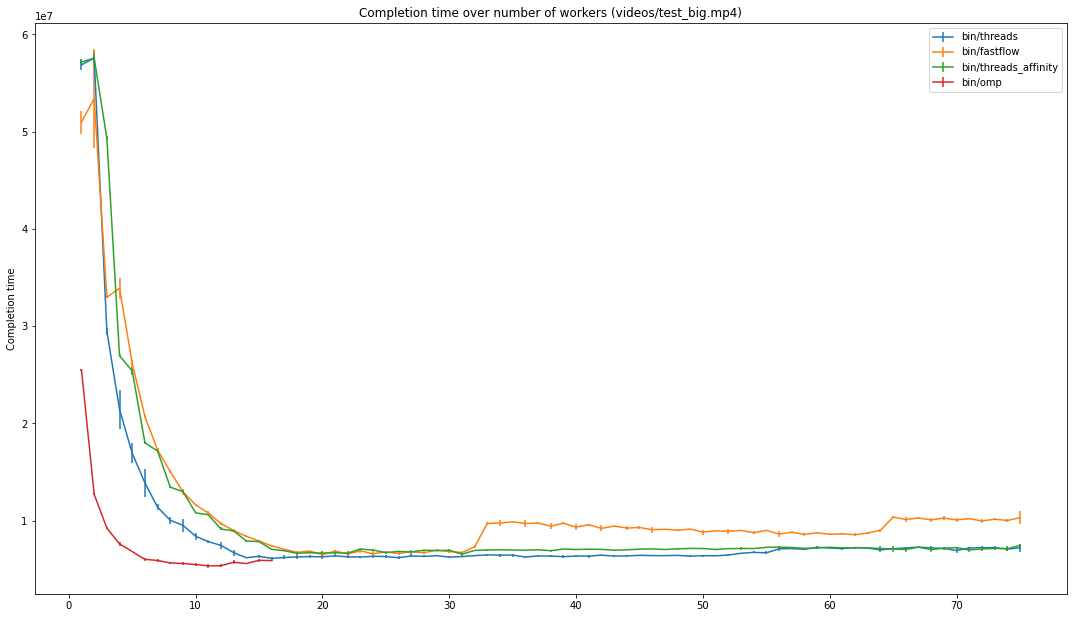

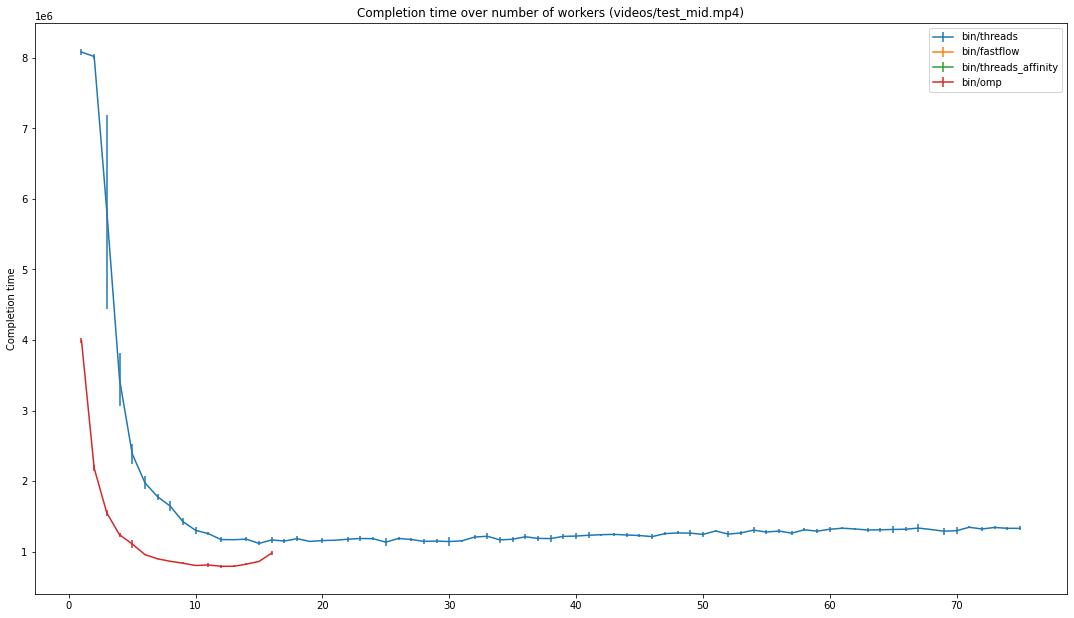

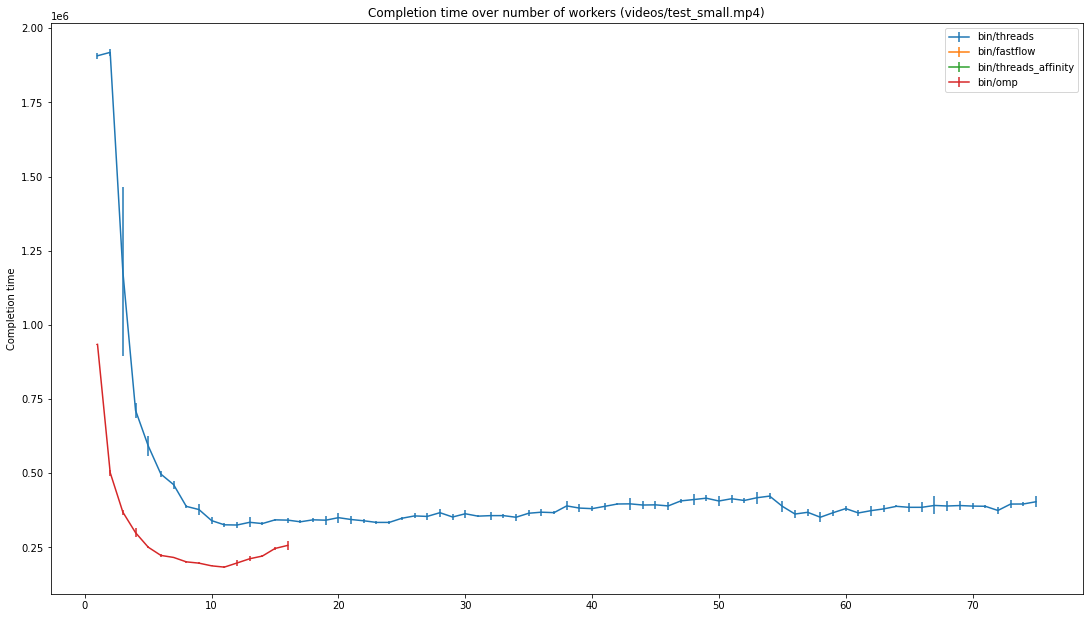

In [77]:
for f in filenames:
    # Add all program speedups
    plt.gcf().set_size_inches(18.5, 10.5) 
    seq_time = sequentials[sequentials['filename'] == f]['avg'].values[0]
    for p in programs:
        x = df[(df['name'] == p) & (df['filename'] == f)]['nworkers']
        y = df[(df['name'] == p) & (df['filename'] == f)]['avg']
        e = df[(df['name'] == p) & (df['filename'] == f)]['var']
        plt.errorbar(x, y, yerr=e, label=p)

    # Add ideal speedup
    #ax.plot(all_n_workers, [4308/ (16035/nw + 723) for nw in n_workers], label='ideal', linestyle='--')

    plt.legend()
    plt.ylabel("Completion time")
    plt.title(f"Completion time over number of workers ({f})")
    plt.savefig(f'completion_time_{crop_slash(f)}.svg')  
    plt.show()

In [85]:
sequentials[sequentials['filename'] == f]['avg'].values[0]

2082632

In [87]:
 df[(df['name'] == 'bin/threads') & (df['filename'] == 'videos/test_big.mp4')]['avg']

0     56878821
1     57575967
2     29476920
3     21429395
4     16920769
        ...   
70     7176477
71     7214472
72     7213526
73     7073141
74     7192516
Name: avg, Length: 75, dtype: int64

In [84]:
seq_time / df[(df['name'] == 'bin/threads') & (df['filename'] == 'videos/test_big.mp4')]['nworkers']

0     2.082632e+06
1     1.041316e+06
2     6.942107e+05
3     5.206580e+05
4     4.165264e+05
          ...     
70    2.933285e+04
71    2.892544e+04
72    2.852921e+04
73    2.814368e+04
74    2.776843e+04
Name: nworkers, Length: 75, dtype: float64

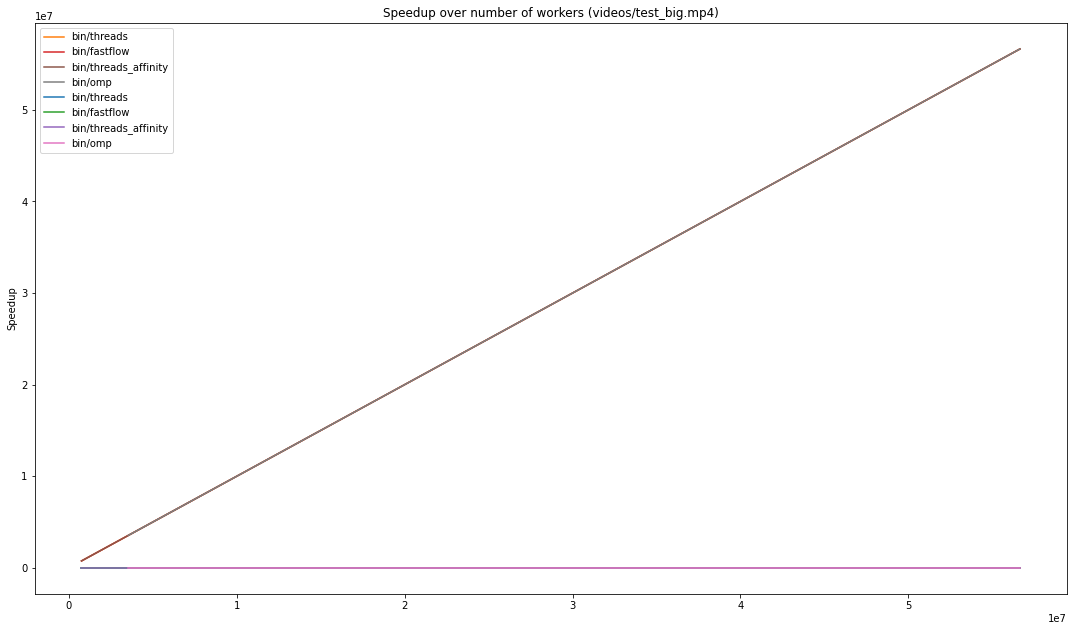

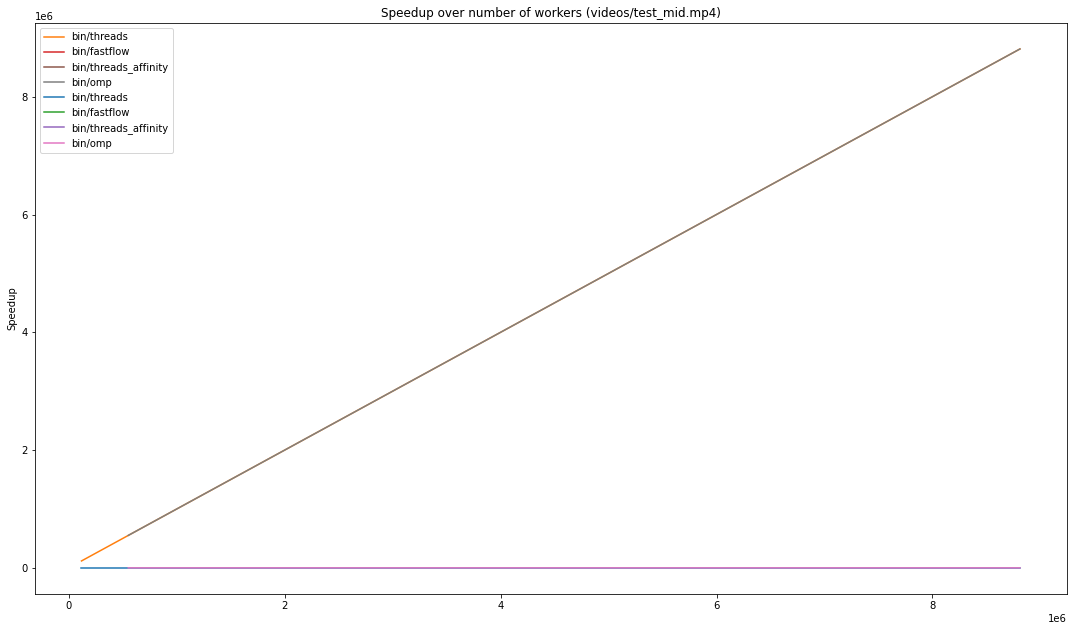

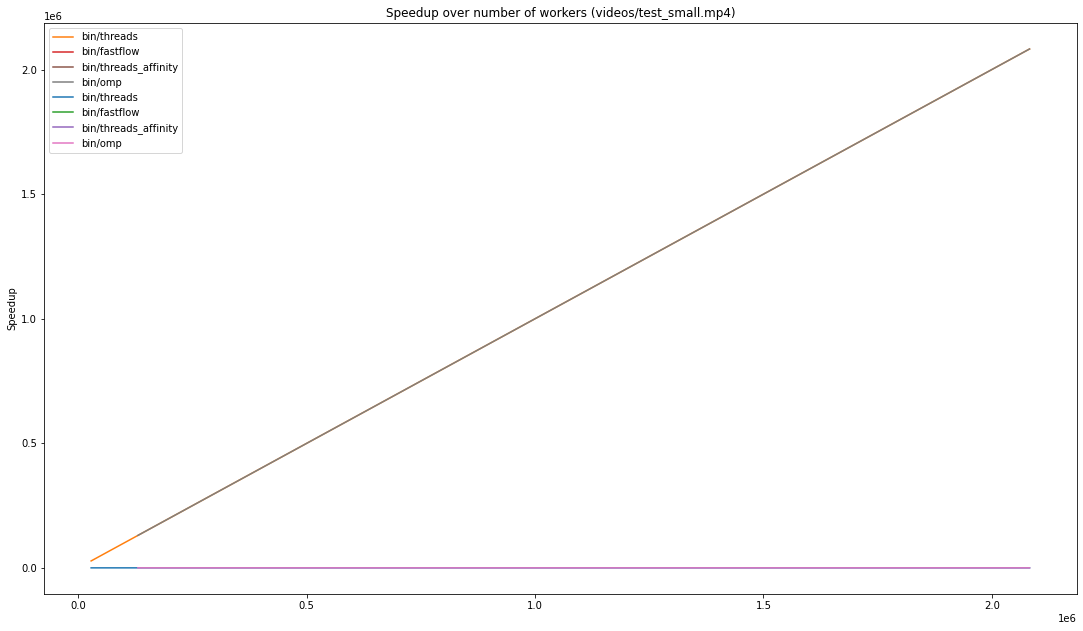

In [83]:
for f in filenames:
    # Add all program speedups
    plt.gcf().set_size_inches(18.5, 10.5) 
    seq_time = sequentials[sequentials['filename'] == f]['avg'].values[0]
    for p in programs:
        x = seq_time / df[(df['name'] == p) & (df['filename'] == f)]['nworkers']
        y = seq_time / df[(df['name'] == p) & (df['filename'] == f)]['avg']
        plt.errorbar(x, y, label=p)
        plt.plot(x, x, label=p)

    # Add ideal speedup
    #ax.plot(all_n_workers, [4308/ (16035/nw + 723) for nw in n_workers], label='ideal', linestyle='--')

    plt.legend()
    plt.ylabel("Speedup")
    plt.title(f"Speedup over number of workers ({f})")
    plt.savefig(f'speedup_{crop_slash(f)}.svg')  
    plt.show()

In [69]:
df[(df['name'] == 'bin/threads') & (df['filename'] == 'videos/test_big.mp4')]['nworkers']

0      1
1      2
2      3
3      4
4      5
      ..
70    71
71    72
72    73
73    74
74    75
Name: nworkers, Length: 75, dtype: int64